In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score



In [14]:
data_ExtraTrees = pd.read_csv('2_data_ExtraTrees.csv')
data_Random_Forest = pd.read_csv('2_data_Random_Forest.csv')
data_GradientBoost = pd.read_csv('2_data_GradientBoost.csv')
data_XGBoost = pd.read_csv('2_data_XGBoost.csv')
df = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_CN-MCI_1_After_Pre_Processamento.csv')
df_hipo_train= data_Random_Forest
df_original = pd.read_csv('/home/cid34senhas/Desktop/DAATP/Entrega/1_DF_CN-MCI_1_After_Pre_Processamento.csv')

In [4]:
# função que constrói os modelos, apresentando as métricas
def train_and_predict(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34, stratify=y)
    modelos = [
     ExtraTreesClassifier(criterion='gini', max_depth=20, random_state=34),
    RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=34),
    GradientBoostingClassifier(
        learning_rate=0.1, n_estimators=100, random_state=34
    ),
    XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.05,colsample_bytree=0.4, subsample=0.8, random_state=34)
    ]
             

    reports = []
    f1_scores = [] 
    pred = []
    results = []
    cv_scores = [] 
    names = ['ExtraTrees', 'RandomForest', 'GradientBoosting', 'XGBOOST']

    for i, model in enumerate(modelos):
        # Treina o modelo
        model.fit(X_train, y_train)



        # Faz previsões no conjunto de teste
        y_pred = model.predict(X_test)
        pred.append(y_pred)  # Armazena as previsões

        # Calcula e armazena o relatório de classificação
        report = classification_report(y_test, y_pred, zero_division=0)
        reports.append(report)

        # Calcula e armazena o F1 Macro Score
        f1 = f1_score(y_test, y_pred, average='macro')
        f1_scores.append(f1)

    for i, model in enumerate(modelos):        
        
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
        cv_scores.append(scores)  
  
    

    # Exibe os relatórios e os F1 Scores lado a lado
    for i, report in enumerate(reports):
        print("Model {} ({}):\n{}".format(i + 1, names[i], report))
        print("F1_Macro: {:.5f}".format(f1_scores[i]))
        print("Mean CV F1_Macro: {:.5f}".format(cv_scores[i].mean()))
        print("=" * 50)
        results.append({'model': names[i],
            'f1_macro': f1_scores[i],
            'cv_f1_macro_mean':cv_scores[i].mean()})
    

    return results





In [5]:
def outlier_distribution_by_class(df, target_column):
    """
    Identifica outliers em um dataset usando a distância interquartil (IQR),
    calcula a distribuição de outliers por classe, e calcula a porcentagem
    dos outliers detectados pertencentes a cada classe em relação ao total de outliers.

    Args:
        df (pd.DataFrame): Dataset de entrada.
        target_column (str): Nome da coluna que contém as classes.

    Returns:
        pd.DataFrame: DataFrame com o número e a porcentagem de outliers detectados por classe.
    """
    outlier_indices = set()

    # Iterar pelas colunas numéricas, ignorando a coluna de classe
    for col in df.select_dtypes(include=[float, int]).columns:
        if col != target_column:
            # Calcular quartis e IQR
            lower_quartile = df[col].quantile(0.25)
            upper_quartile = df[col].quantile(0.75)
            iqr = upper_quartile - lower_quartile

            # Identificar índices de outliers
            col_outliers = df[(df[col] < lower_quartile - 1.5 * iqr) | 
                              (df[col] > upper_quartile + 1.5 * iqr)].index
            outlier_indices.update(col_outliers)

    # Converter o conjunto de índices para lista
    outlier_indices = list(outlier_indices)

    # Filtrar apenas os outliers
    outliers_df = df.loc[outlier_indices]

    # Contar outliers por classe
    class_counts = outliers_df[target_column].value_counts().to_dict()

    # Total de outliers detectados
    total_outliers = len(outliers_df)
    
    # Criar o resultado
    result = []
    for cls, count in class_counts.items():
        total_class = len(df[df['Transition'] == cls])

        percentage = (count / total_class) * 100
        result.append({
            "Class": cls,
            "Outliers Count": count,
            "Total Outliers": total_outliers,
            "Percentage of Total Outliers": percentage
        })

    # Converter para DataFrame
    result_df = pd.DataFrame(result)
    return result_df


Fazer distancia interquartil 
para as linhas que tem outliers 
ver a que linha os outliers pertencem 

e testar e ver se da 

In [17]:
print(df_original.shape)

outlier_distribution = outlier_distribution_by_class(df_original,  target_column='Transition')
print(outlier_distribution)

(305, 2014)
   Class  Outliers Count  Total Outliers  Percentage of Total Outliers
0      0              96             305                         100.0
1      3              71             305                         100.0
2      2              68             305                         100.0
3      1              60             305                         100.0
4      4              10             305                         100.0


In [16]:
print(data_Random_Forest.shape)
outlier_distribution = outlier_distribution_by_class(data_Random_Forest,  target_column='Transition')

print(outlier_distribution)

(305, 385)
   Class  Outliers Count  Total Outliers  Percentage of Total Outliers
0      0              95             303                     98.958333
1      3              71             303                    100.000000
2      2              67             303                     98.529412
3      1              60             303                    100.000000
4      4              10             303                    100.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers_overlay(df, outliers_df, target_column):
    """
    Plota todos os gráficos de dispersão entre todas as colunas numéricas e sobrepõe os outliers com cores por classe.

    Args:
        df (pd.DataFrame): Dataset completo.
        outliers_df (pd.DataFrame): DataFrame contendo apenas os outliers.
        target_column (str): Nome da coluna de classes.
    """
    # Selecionar todas as colunas numéricas do dataset
    numeric_cols = df.select_dtypes(include=[float, int]).columns

    if len(numeric_cols) < 2:
        raise ValueError("O dataset precisa ter pelo menos duas colunas numéricas para criar o scatter plot.")

    # Gerar o gráfico pairplot para todas as combinações de colunas numéricas
    g = sns.pairplot(df, vars=numeric_cols, hue=target_column, palette='deep')

    # Sobrepor os outliers para cada gráfico
    for ax in g.axes.flatten():
        sns.scatterplot(data=outliers_df, x=ax.get_xlabel(), y=ax.get_ylabel(), hue=target_column, 
                        style=target_column, palette='deep', markers=True, s=100, ax=ax)

    plt.suptitle("Pairwise Scatter Plots com Outliers sobrepostos", fontsize=14)
    plt.legend(title=target_column)
    plt.show()


In [9]:
# Identificar os outliers e calcular a porcentagem de outliers para cada coluna
outlier_indices_per_column = {}  # Dicionário para armazenar os índices de outliers por coluna
outlier_percentages = {}  # Dicionário para armazenar as porcentagens de outliers por coluna

for col in data_Random_Forest.select_dtypes(include=[float, int]).columns:
    if col != 'Transition':
        lower_quartile = df[col].quantile(0.25)
        upper_quartile = df[col].quantile(0.75)
        iqr = upper_quartile - lower_quartile
        col_outliers = df[(df[col] < lower_quartile - 1.5 * iqr) | 
                          (df[col] > upper_quartile + 1.5 * iqr)].index
        outlier_indices_per_column[col] = col_outliers
        outlier_percentages[col] = len(col_outliers) / len(df) * 100  # Percentual de outliers

# Ordenar as colunas pela maior porcentagem de outliers
top_10_outlier_columns = sorted(outlier_percentages, key=outlier_percentages.get, reverse=True)[:10]

# Coletar os índices de outliers das 10 colunas com maior percentual de outliers
top_10_outlier_indices = set()
for col in top_10_outlier_columns:
    top_10_outlier_indices.update(outlier_indices_per_column[col])

# Converter o set de índices em uma lista para usá-los como indexador
top_10_outlier_indices = list(top_10_outlier_indices)

# Criar o DataFrame de outliers com as 10 colunas
outliers_df = df.loc[top_10_outlier_indices]
df = data_ExtraTrees.loc[top_10_outlier_indices]
# Plotar o gráfico com outliers sobrepostos para as 10 colunas com maior percentual de outliers
#plot_outliers_overlay(df, outliers_df, target_column='Transition')


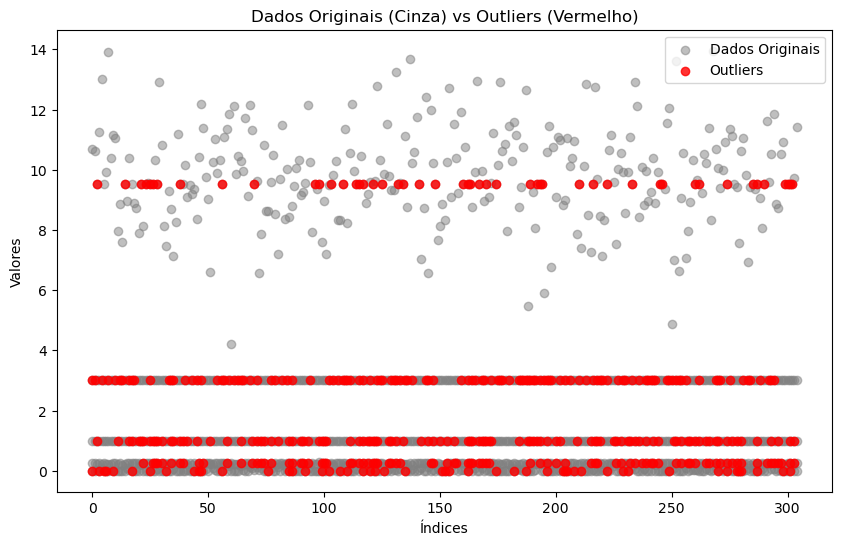

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def process_outliers_with_tracking(df, columns, method):
    """
    Processa outliers e retorna os índices tratados para visualização.

    Parameters:
    - df: DataFrame com os dados originais.
    - columns: Lista de colunas a serem processadas.
    - method: Método para lidar com os outliers ('remove', 'median', 'mode', 'mean').

    Returns:
    - df: DataFrame após tratamento.
    - tracked_outliers: Dicionário com índices dos outliers por coluna.
    """
    tracked_outliers = {}  # Para armazenar índices dos outliers

    for col in columns:
        # Calcula as estatísticas do IQR
        median = df[col].median()
        lower_quartile = df[col].quantile(0.25)
        upper_quartile = df[col].quantile(0.75)
        iqr = upper_quartile - lower_quartile

        # Identifica os índices de outliers
        outliers = df[(df[col] < lower_quartile - 1.5 * iqr) | (df[col] > upper_quartile + 1.5 * iqr)]
        indices = outliers.index
        tracked_outliers[col] = indices  # Salva os índices

        # Processa os outliers de acordo com o método especificado
        if method == "remove":
            df = df.drop(indices)
        elif method == "median":
            df.loc[indices, col] = median
        elif method == "mode":
            df.loc[indices, col] = df[col].mode()[0]
        elif method == "mean":
            df.loc[indices, col] = df[col].mean()
        else:
            raise ValueError("Invalid method. Must be 'remove', 'median', 'mode', or 'mean'.")
    
    return df, tracked_outliers

def plot_overall_outliers(original_df, tracked_outliers, columns):
    """
    Plota um gráfico geral destacando os outliers em vermelho contra os dados originais em cinza.

    Parameters:
    - original_df: DataFrame original.
    - tracked_outliers: Dicionário com índices dos outliers.
    - columns: Lista de colunas numéricas para análise.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot dos dados originais (cinza)
    for col in columns:
        plt.scatter(original_df.index, original_df[col], color="gray", alpha=0.5, label="Dados Originais" if col == columns[0] else "")

    # Scatter plot dos outliers (vermelho)
    for col, indices in tracked_outliers.items():
        outlier_points = original_df.loc[indices, col]
        plt.scatter(outlier_points.index, outlier_points, color="red", alpha=0.8, label="Outliers" if col == columns[0] else "")

    plt.xlabel("Índices")
    plt.ylabel("Valores")
    plt.title("Dados Originais (Cinza) vs Outliers (Vermelho)")
    plt.legend()
    plt.show()

def print_outlier_values(df, tracked_outliers, columns):
    """
    Exibe os valores originais das colunas e os outliers detectados.

    Parameters:
    - df: DataFrame com os dados originais.
    - tracked_outliers: Dicionário com índices dos outliers.
    - columns: Lista de colunas numéricas para análise.
    """


# Exemplo de uso
# Supondo que o df_hipo_train já esteja definido como seu DataFrame

# Seleciona as colunas numéricas
columns_to_process = df_hipo_train.select_dtypes(include=["number"]).columns

# Processa os outliers e rastreia os índices
df_treated, outliers_tracked = process_outliers_with_tracking(df_hipo_train, columns_to_process, method="median")

# Conta o número de outliers em cada coluna
outlier_counts = {col: len(indices) for col, indices in outliers_tracked.items()}

# Ordena as colunas pelo número de outliers e seleciona as 5 com mais outliers
top_5_columns = sorted(outlier_counts, key=outlier_counts.get, reverse=True)[:5]

# Filtra os outliers para as 5 colunas com mais outliers
top_5_outliers = {col: outliers_tracked[col] for col in top_5_columns}

# Exibe os valores originais e os outliers para as 5 colunas com mais outliers
print_outlier_values(df_hipo_train, top_5_outliers, top_5_columns)

# Plota o gráfico geral destacando os outliers apenas das 5 colunas com mais outliers
plot_overall_outliers(df_hipo_train, top_5_outliers, top_5_columns)
